# Importing libraries

In [134]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
# Categorical Features encoding
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder ,  LabelEncoder

# Feature scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import  minmax_scale
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# Pipline
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.multioutput import RegressorChain

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Ensempling models
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier,HistGradientBoostingClassifier


# Loss function 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
train_path = "/content/drive/MyDrive/final_proj/train.csv"
train_df = pd.DataFrame(pd.read_csv(train_path))

**artist:** Name of the Artist.

**song:** Name of the Track.

**popularity:** The higher the value the more popular the song is.

**danceability:** Danceability describes how suitable a track is for dancing ***based on a combination of musical elements including tempo, rhythm***

**energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

**key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on..

**loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative

**mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**speechiness:** Speechiness detects the presence of spoken words in a track. ***The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.***


*   Values above 0.66 describe tracks that are probably made entirely of spoken words.
*   Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.
*   Values below 0.33 most likely represent music and other non-speech-like tracks.

**acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". ***The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0***.

**liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. ***A value above 0.8 provides strong likelihood that the track is live***.

**valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. ***Tracks with high valence sound more positive*** (e.g. happy, cheerful, euphoric), while ***tracks with low valence sound more negative*** (e.g. sad, depressed, angry).

**tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**duration in milliseconds:** Time of the song

**time_signature:** a notational convention used in Western musical notation to specify how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat.

***Class:*** Genre of the track.


**Extra Knowledges** ⚡

**key:**

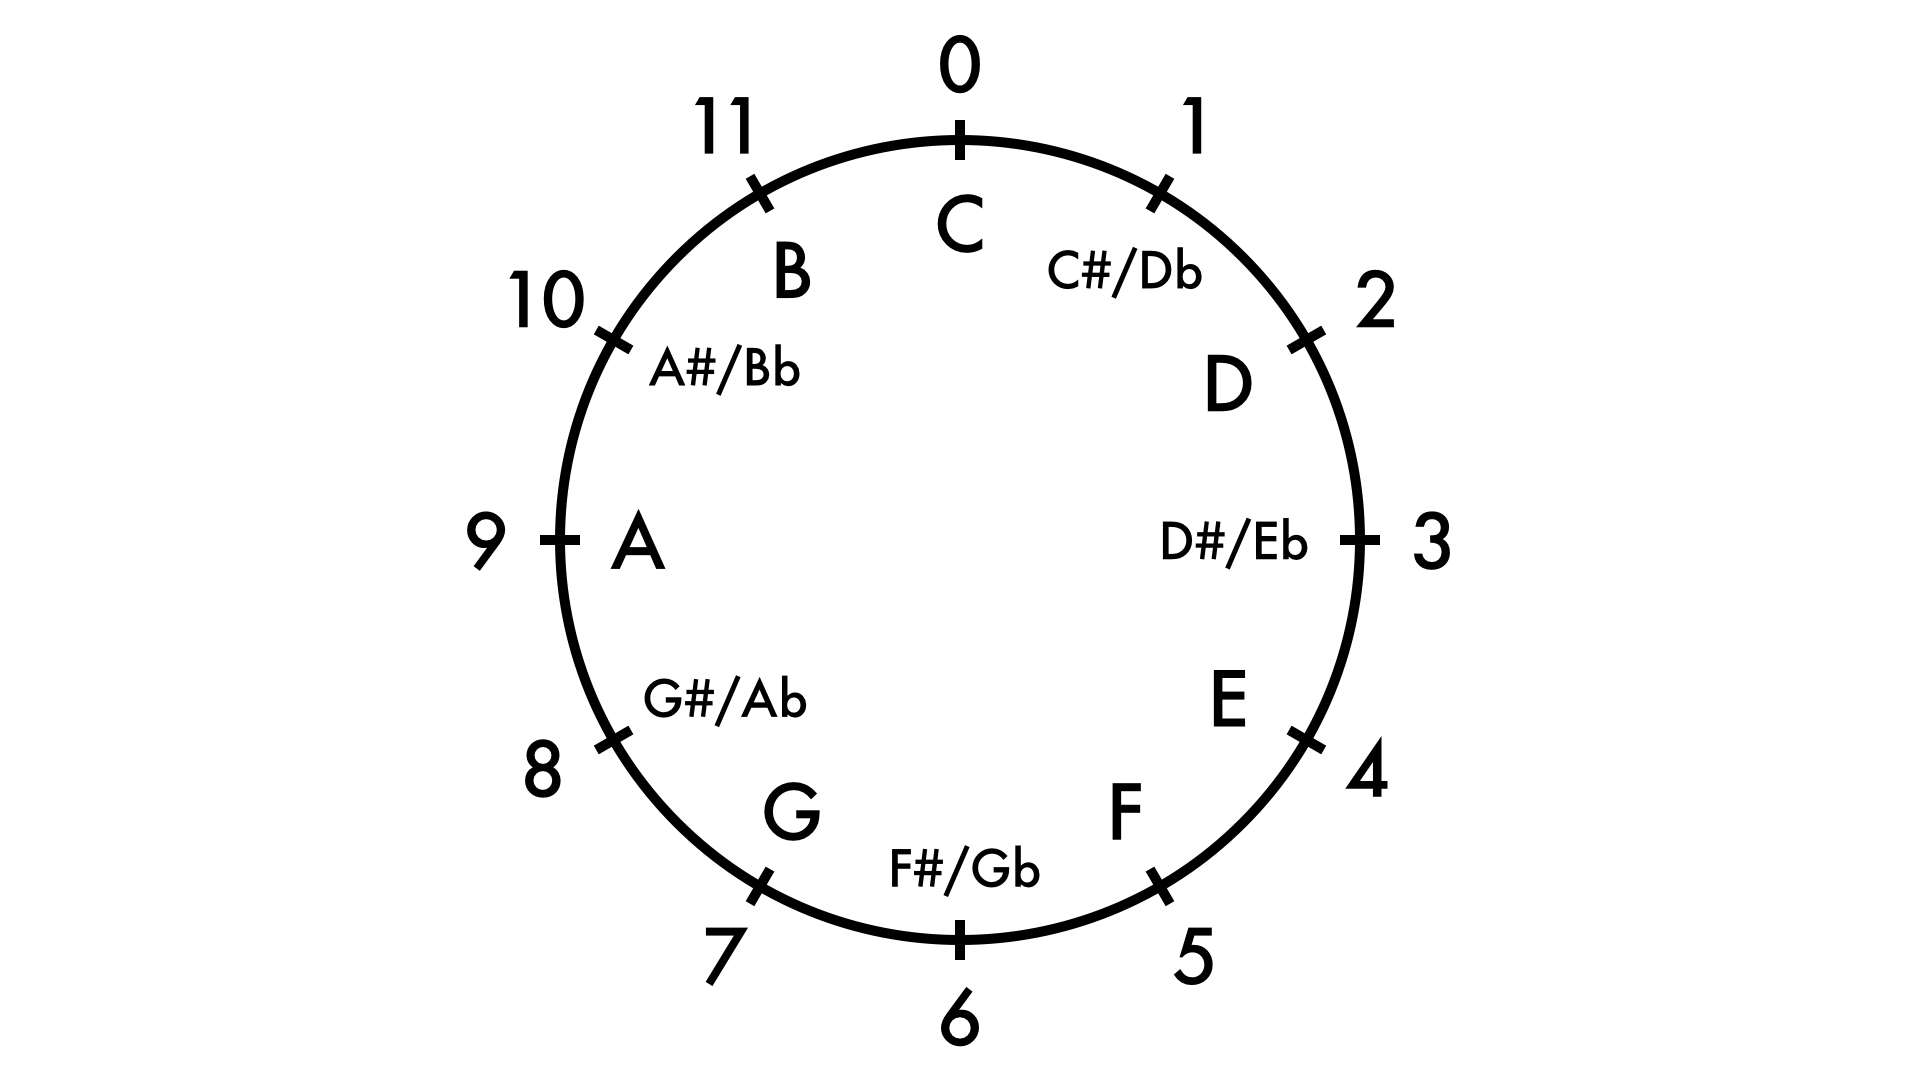

**loudness:**

0 dB means that you are right at the threshold of human hearing. A positive dB means that the sound is a few times louder than the threshold, while a negative dB means that you are a few times softer than that threshold.

0 dB also depends on the setting/context of the situation. For instance, when dealing with professional sound equipment, **0 dB usually refers to the loudest level before distortion begins**.
[What Is A Decibel?](https://www.scienceabc.com/pure-sciences/why-negative-decibels-are-a-thing.html)



**time_signature:** plus information about tempo. [What is the connection between time-signature, beat, and tempo?](https://music.stackexchange.com/questions/3346/what-is-the-connection-between-time-signature-beat-and-tempo)

**Important notes:**


*   Mode and valence represent the same information.
*   speechiness is inversely proportional to instrumentalness so they the represent same information.
*   loudness is inversely proportional to acousticness, and directly proportional to aliveness.
*   song name doesn't give us any useful information. so we will drop them.
*   duration_in min/ms doesn't give us any useful information. so we will drop them.
*   name of artist will affect the genre of the track.

artist label encoder func
left skewed to right skew func
log right skewed features
instrumentalness imputer


# Data cleaning and visualization

In [138]:
train_df.drop("id",axis = 1,inplace = True)

In [139]:
train_df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,"Lata Mangeshkar, Hariharan",Likha Hai Yeh,23.00,0.37,0.67,7.00,-11.01,0,0.04,0.81,0.00,0.24,0.80,177.16,5.21,3,3
1,Kalan.FrFr,No Love ft. Mozzy & Cypress Moreno,45.00,0.66,0.64,6.00,-8.14,1,0.39,0.42,NaN,0.12,0.69,99.52,206602.00,4,5
2,The Cure,Play For Today,51.00,0.46,0.73,11.00,-12.05,0,0.14,0.05,0.02,0.12,0.78,80.42,218960.00,4,6
3,Miguel Poveda,Coplas Del Querer,40.00,0.51,0.29,5.00,-8.90,0,0.05,0.83,NaN,0.10,0.32,96.14,332467.00,3,9
4,Leif Vollebekk,Long Blue Light,63.00,0.55,0.48,9.00,-9.11,1,0.03,0.52,0.11,0.16,0.51,71.55,200173.00,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,"Ólafur Arnalds, Alice Sara Ott",Verses,42.00,0.14,0.16,1.00,-17.84,0,0.04,0.87,0.92,0.39,0.03,142.24,4.05,3,7
14392,Citizen Cope,Something to Believe In,50.00,0.66,0.88,5.00,-7.04,1,0.05,0.05,0.01,0.09,0.88,156.10,221840.00,4,10
14393,WurlD,WAYO (KPE LE WU),41.00,0.70,0.54,4.00,-8.05,0,0.15,0.42,0.00,0.11,0.66,91.94,196093.00,4,9
14394,Rafferty,Making a Home,48.00,0.41,0.57,11.00,-6.01,1,0.04,0.30,NaN,0.24,0.47,159.70,238173.00,4,9


number of columns in train and test datasets.

In [140]:
print("Train columns: ",len(train_df.columns))

Train columns:  17


In [141]:
train_df.shape[0]

14396

In [142]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         14396 non-null  object 
 1   Track Name          14396 non-null  object 
 2   Popularity          14045 non-null  float64
 3   danceability        14396 non-null  float64
 4   energy              14396 non-null  float64
 5   key                 12784 non-null  float64
 6   loudness            14396 non-null  float64
 7   mode                14396 non-null  int64  
 8   speechiness         14396 non-null  float64
 9   acousticness        14396 non-null  float64
 10  instrumentalness    10837 non-null  float64
 11  liveness            14396 non-null  float64
 12  valence             14396 non-null  float64
 13  tempo               14396 non-null  float64
 14  duration_in min/ms  14396 non-null  float64
 15  time_signature      14396 non-null  int64  
 16  Clas

In [143]:
print("Number of missing values in each columns: \n" ,train_df.isnull().sum())

Number of missing values in each columns: 
 Artist Name              0
Track Name               0
Popularity             351
danceability             0
energy                   0
key                   1612
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3559
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64


In [144]:
print("ratio of missing values in each columns: (@%) \n" ,train_df.isnull().sum()/train_df.shape[0]*100)

ratio of missing values in each columns: (@%) 
 Artist Name           0.00
Track Name            0.00
Popularity            2.44
danceability          0.00
energy                0.00
key                  11.20
loudness              0.00
mode                  0.00
speechiness           0.00
acousticness          0.00
instrumentalness     24.72
liveness              0.00
valence               0.00
tempo                 0.00
duration_in min/ms    0.00
time_signature        0.00
Class                 0.00
dtype: float64


We note that there are too many missing values (above: 5% ratio) in "key" and "instrumentalness" columns, where we see that 2% ratio in the "Popularity" may look acceptable. Later, we will deal with all these missing values.

In [145]:
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<key>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")
print(train_df["key"].value_counts())
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<mode>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")
print(train_df["mode"].value_counts())
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<time_signature>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")
print(train_df["time_signature"].value_counts())
print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<Class>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")
print(train_df["Class"].value_counts())

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<key>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

7.00     1684
2.00     1592
9.00     1578
1.00     1329
4.00     1236
11.00    1167
5.00     1125
6.00      948
8.00      899
10.00     814
3.00      412
Name: key, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<mode>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

1    9193
0    5203
Name: mode, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<time_signature>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

4    13200
3      953
5      159
1       84
Name: time_signature, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<Class>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: Class, dtype: int64


In [146]:
train_df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14045.00,14396.00,14396.00,12784.00,14396.00,14396.00,14396.00,14396.00,10837.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00
mean,44.59,0.54,0.66,5.96,-7.90,0.64,0.08,0.25,0.18,0.20,0.49,122.73,200955.01,3.93,6.70
std,17.44,0.17,0.24,3.19,4.06,0.48,0.08,0.31,0.30,0.16,0.24,29.56,111846.29,0.35,3.21
min,1.00,0.06,0.00,1.00,-39.95,0.00,0.02,0.00,0.00,0.01,0.02,34.13,0.53,1.00,0.00
25%,33.00,0.43,0.51,3.00,-9.53,0.00,0.03,0.00,0.00,0.10,0.30,99.80,166998.75,4.00,5.00
50%,44.00,0.55,0.70,6.00,-7.01,1.00,0.05,0.08,0.00,0.13,0.48,120.07,209584.50,4.00,8.00
75%,56.00,0.66,0.86,9.00,-5.16,1.00,0.08,0.43,0.20,0.26,0.67,141.99,252297.00,4.00,10.00
max,100.00,0.99,1.00,11.00,1.35,1.00,0.95,1.00,1.00,1.00,0.99,217.42,1477187.00,5.00,10.00


In [147]:
train_df["Popularity"] = train_df["Popularity"] / 100

In [148]:
def artist_name_imputing_dic(data, artist_col = "Artist Name"):
  artist_col_ = list(data[artist_col].value_counts().index)
  length = len(artist_col_)
  label_list = {name:i for name , i in zip(artist_col_,range(length))}
  return label_list

In [149]:
def artist_imputer(data, label_list, artist_col = "Artist Name"):
  list1 = list(data[artist_col])
  res = []
  for name in list1:
    if name in list(label_list.keys()):
      label = label_list[name]
    else:
      label = np.NaN
    res = res + [label]
  return pd.DataFrame(res)

In [150]:
train_df = train_df.applymap(lambda x:x.lower() if type(x) == str else x)

In [151]:
label_list_ = artist_name_imputing_dic(data = train_df , artist_col = "Artist Name")

In [152]:
train=artist_imputer(data = train_df, label_list=label_list_, artist_col = "Artist Name")

In [153]:
train_df.reset_index(inplace= True)

In [154]:
train_df

,index,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0,"lata mangeshkar, hariharan",likha hai yeh,0.23,0.37,0.67,7.00,-11.01,0,0.04,0.81,0.00,0.24,0.80,177.16,5.21,3,3
1,1,kalan.frfr,no love ft. mozzy & cypress moreno,0.45,0.66,0.64,6.00,-8.14,1,0.39,0.42,NaN,0.12,0.69,99.52,206602.00,4,5
2,2,the cure,play for today,0.51,0.46,0.73,11.00,-12.05,0,0.14,0.05,0.02,0.12,0.78,80.42,218960.00,4,6
3,3,miguel poveda,coplas del querer,0.40,0.51,0.29,5.00,-8.90,0,0.05,0.83,NaN,0.10,0.32,96.14,332467.00,3,9
4,4,leif vollebekk,long blue light,0.63,0.55,0.48,9.00,-9.11,1,0.03,0.52,0.11,0.16,0.51,71.55,200173.00,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,14391,"ólafur arnalds, alice sara ott",verses,0.42,0.14,0.16,1.00,-17.84,0,0.04,0.87,0.92,0.39,0.03,142.24,4.05,3,7
14392,14392,citizen cope,something to believe in,0.50,0.66,0.88,5.00,-7.04,1,0.05,0.05,0.01,0.09,0.88,156.10,221840.00,4,10
14393,14393,wurld,wayo (kpe le wu),0.41,0.70,0.54,4.00,-8.05,0,0.15,0.42,0.00,0.11,0.66,91.94,196093.00,4,9
14394,14394,rafferty,making a home,0.48,0.41,0.57,11.00,-6.01,1,0.04,0.30,NaN,0.24,0.47,159.70,238173.00,4,9


In [155]:
train_df["Artist Name"] = train

In [156]:
train_df.drop("index",axis=1,inplace= True)
train_df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,3504,likha hai yeh,0.23,0.37,0.67,7.00,-11.01,0,0.04,0.81,0.00,0.24,0.80,177.16,5.21,3,3
1,715,no love ft. mozzy & cypress moreno,0.45,0.66,0.64,6.00,-8.14,1,0.39,0.42,NaN,0.12,0.69,99.52,206602.00,4,5
2,54,play for today,0.51,0.46,0.73,11.00,-12.05,0,0.14,0.05,0.02,0.12,0.78,80.42,218960.00,4,6
3,2504,coplas del querer,0.40,0.51,0.29,5.00,-8.90,0,0.05,0.83,NaN,0.10,0.32,96.14,332467.00,3,9
4,6023,long blue light,0.63,0.55,0.48,9.00,-9.11,1,0.03,0.52,0.11,0.16,0.51,71.55,200173.00,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,4026,verses,0.42,0.14,0.16,1.00,-17.84,0,0.04,0.87,0.92,0.39,0.03,142.24,4.05,3,7
14392,2009,something to believe in,0.50,0.66,0.88,5.00,-7.04,1,0.05,0.05,0.01,0.09,0.88,156.10,221840.00,4,10
14393,7887,wayo (kpe le wu),0.41,0.70,0.54,4.00,-8.05,0,0.15,0.42,0.00,0.11,0.66,91.94,196093.00,4,9
14394,2347,making a home,0.48,0.41,0.57,11.00,-6.01,1,0.04,0.30,NaN,0.24,0.47,159.70,238173.00,4,9


In [157]:
train_df_ = train_df.drop(["Track Name"], axis = 1 )

In [158]:
train_df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         14396 non-null  int64  
 1   Popularity          14045 non-null  float64
 2   danceability        14396 non-null  float64
 3   energy              14396 non-null  float64
 4   key                 12784 non-null  float64
 5   loudness            14396 non-null  float64
 6   mode                14396 non-null  int64  
 7   speechiness         14396 non-null  float64
 8   acousticness        14396 non-null  float64
 9   instrumentalness    10837 non-null  float64
 10  liveness            14396 non-null  float64
 11  valence             14396 non-null  float64
 12  tempo               14396 non-null  float64
 13  duration_in min/ms  14396 non-null  float64
 14  time_signature      14396 non-null  int64  
 15  Class               14396 non-null  int64  
dtypes: f

In [159]:
x_ = train_df_.iloc[:,train_df_.columns != "Class"]
y_ = train_df_[["Class"]].copy()

In [160]:
num_features = ["Popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo",'duration_in min/ms']
cat_features = ["Artist Name","mode",'key',"time_signature"]

In [161]:
for i in cat_features:
    x_[i] = x_[i].fillna(x_[i].mode()[0])
for i in num_features:
    x_[i] = x_[i].fillna(x_[i].median())

In [162]:
catkey = {7 : 0, 2 : 1, 9 : 2, 1 : 3, 4 : 4, 11 : 5, 5 : 6, 6 : 7, 8 : 8, 10 : 9, 3 : 10}
x_["key"] = x_["key"].apply(lambda i: catkey[i])
cattime_signature = {4 : 0, 3 : 1, 5 : 2, 1 : 3}
x_["time_signature"] = x_["time_signature"].apply(lambda i: cattime_signature[i])
x_

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,3504,0.23,0.37,0.67,0,-11.01,0,0.04,0.81,0.00,0.24,0.80,177.16,5.21,1
1,715,0.45,0.66,0.64,7,-8.14,1,0.39,0.42,0.00,0.12,0.69,99.52,206602.00,0
2,54,0.51,0.46,0.73,5,-12.05,0,0.14,0.05,0.02,0.12,0.78,80.42,218960.00,0
3,2504,0.40,0.51,0.29,6,-8.90,0,0.05,0.83,0.00,0.10,0.32,96.14,332467.00,1
4,6023,0.63,0.55,0.48,2,-9.11,1,0.03,0.52,0.11,0.16,0.51,71.55,200173.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,4026,0.42,0.14,0.16,3,-17.84,0,0.04,0.87,0.92,0.39,0.03,142.24,4.05,1
14392,2009,0.50,0.66,0.88,6,-7.04,1,0.05,0.05,0.01,0.09,0.88,156.10,221840.00,0
14393,7887,0.41,0.70,0.54,4,-8.05,0,0.15,0.42,0.00,0.11,0.66,91.94,196093.00,0
14394,2347,0.48,0.41,0.57,5,-6.01,1,0.04,0.30,0.00,0.24,0.47,159.70,238173.00,0


In [163]:
x_[cat_features] = x_[cat_features]/x_[cat_features].max()
x_[cat_features]

,Artist Name,mode,key,time_signature
0,0.44,0.00,0.00,0.33
1,0.09,1.00,0.70,0.00
2,0.01,0.00,0.50,0.00
3,0.32,0.00,0.60,0.33
4,0.76,1.00,0.20,0.00
...,...,...,...,...
14391,0.51,0.00,0.30,0.33
14392,0.25,1.00,0.60,0.00
14393,1.00,0.00,0.40,0.00
14394,0.30,1.00,0.50,0.00


In [164]:
x_.describe()

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00,14396.00
mean,0.31,0.45,0.54,0.66,0.36,-7.90,0.64,0.08,0.25,0.13,0.20,0.49,122.73,200955.01,0.04
std,0.30,0.17,0.17,0.24,0.31,4.06,0.48,0.08,0.31,0.27,0.16,0.24,29.56,111846.29,0.13
min,0.00,0.01,0.06,0.00,0.00,-39.95,0.00,0.02,0.00,0.00,0.01,0.02,34.13,0.53,0.00
25%,0.05,0.33,0.43,0.51,0.10,-9.53,0.00,0.03,0.00,0.00,0.10,0.30,99.80,166998.75,0.00
50%,0.21,0.44,0.55,0.70,0.30,-7.01,1.00,0.05,0.08,0.00,0.13,0.48,120.07,209584.50,0.00
75%,0.54,0.56,0.66,0.86,0.60,-5.16,1.00,0.08,0.43,0.05,0.26,0.67,141.99,252297.00,0.00
max,1.00,1.00,0.99,1.00,1.00,1.35,1.00,0.95,1.00,1.00,1.00,0.99,217.42,1477187.00,1.00


In [165]:
Quantile_num_features = ["Artist Name","Popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo",'duration_in min/ms']
skewed_scaler = QuantileTransformer(output_distribution='normal')
x_[Quantile_num_features] = pd.DataFrame(skewed_scaler.fit_transform(x_[Quantile_num_features]), columns=Quantile_num_features)

In [166]:
norm_scaler = MinMaxScaler()
x_[Quantile_num_features] = pd.DataFrame(norm_scaler.fit_transform(x_[Quantile_num_features]), columns=Quantile_num_features)

In [167]:
def dest_plots (data,rows=3,cols=4,figsize=(20,20)):
  fig ,ax = plt.subplots(rows,cols,figsize=figsize)
  i = j = 0
  for col in list(data.columns):
    sns.distplot(data[col],ax=ax[j][i]);
    i = i + 1
    if i == cols:
      j = j + 1
      i = 0
  plt.show()

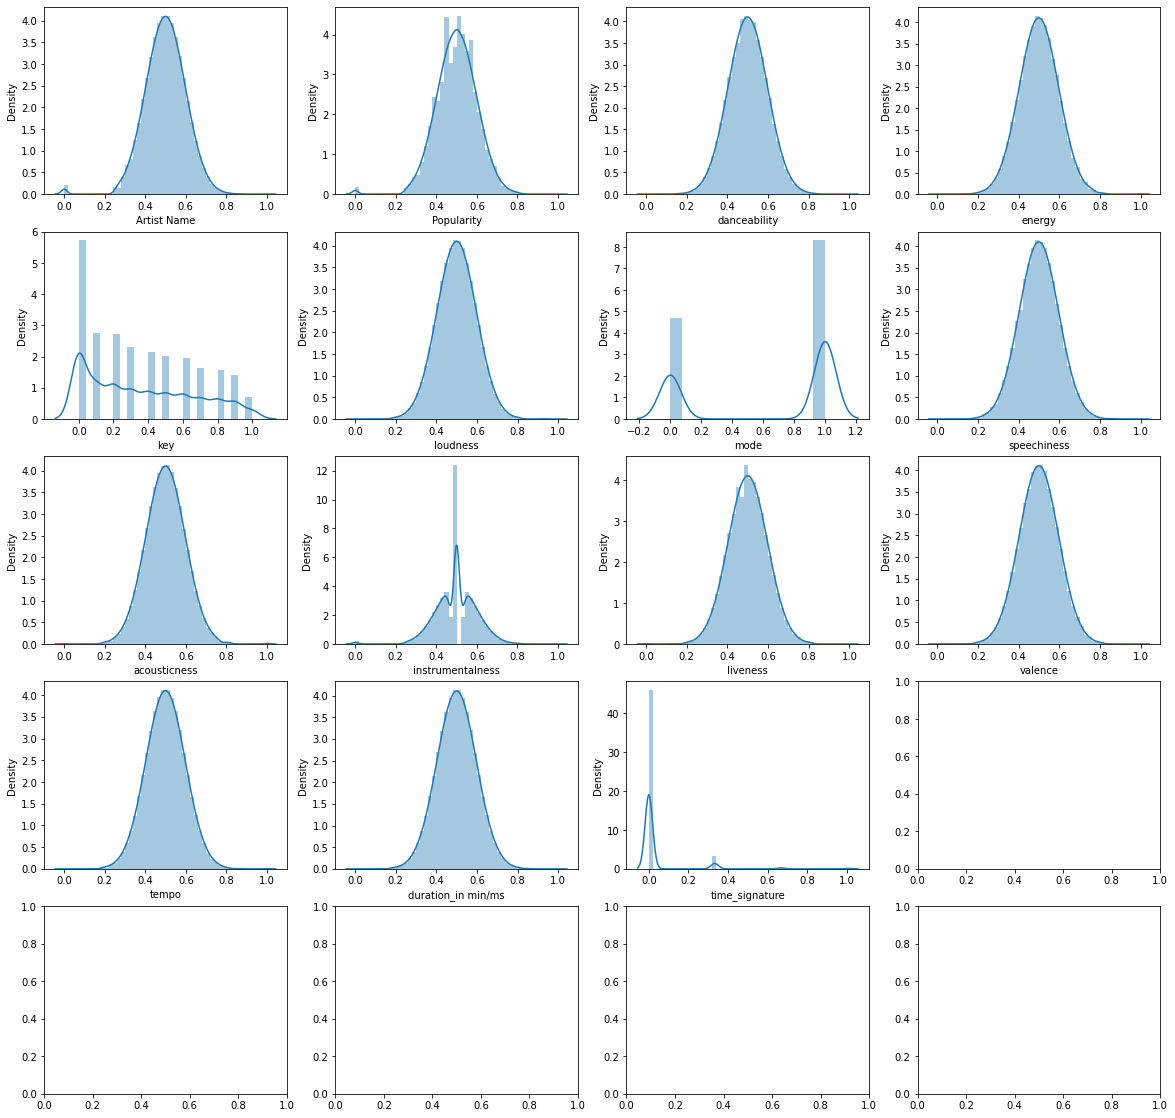

In [168]:
dest_plots(data = x_, rows = 4 , cols = 4)

# Features selection

This section is important to have a good knowledge about features contributions in the training process.

**Apply SelectKBest Algo**

In [169]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [170]:
orderd_rank_features = SelectKBest(score_func=chi2,k= 15)
orderd_features = orderd_rank_features.fit(x_,y_)

In [171]:
dfscors = pd.DataFrame(orderd_features.scores_,columns=["score"])
dfcolumns = pd.DataFrame(x_.columns,columns=["features"])
features_rank = pd.concat([dfcolumns,dfscors], axis= 1)

In [172]:
features_rank.nlargest(15,"score")

,features,score
14,time_signature,136.34
6,mode,126.70
8,acousticness,105.21
13,duration_in min/ms,99.02
3,energy,87.37
2,danceability,65.77
5,loudness,55.34
7,speechiness,55.12
9,instrumentalness,39.21
11,valence,37.00


**Information Gain**

In [173]:
from sklearn.feature_selection import mutual_info_classif

In [174]:
mutual_info = mutual_info_classif(x_,y_)
mutual_data = pd.Series(mutual_info,index=x_.columns)
print(mutual_data.sort_values(ascending=False))

Artist Name          0.46
duration_in min/ms   0.36
acousticness         0.28
energy               0.21
instrumentalness     0.17
danceability         0.16
speechiness          0.15
loudness             0.13
Popularity           0.11
valence              0.09
tempo                0.07
liveness             0.03
key                  0.02
mode                 0.02
time_signature       0.00
dtype: float64


**Features Importance based on Models**

In [175]:
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model1 = ExtraTreesClassifier()
model2 = XGBClassifier(objective='reg:squarederror')
model1.fit(x_,y_)
model2.fit(x_,y_)

XGBClassifier(objective='multi:softprob')

In [176]:
EXT_ranked_features = pd.Series(model1.feature_importances_,index=x_.columns)
XGB_ranked_features = pd.Series(model2.feature_importances_,index=x_.columns)

In [177]:
EXT_ranked_features.nlargest(13)

duration_in min/ms   0.10
acousticness         0.09
speechiness          0.09
energy               0.08
danceability         0.08
Artist Name          0.08
Popularity           0.08
instrumentalness     0.07
loudness             0.07
valence              0.07
tempo                0.06
liveness             0.06
key                  0.05
dtype: float64

In [178]:
XGB_ranked_features.nlargest(13)

speechiness          0.15
duration_in min/ms   0.13
acousticness         0.12
energy               0.10
instrumentalness     0.08
danceability         0.08
Artist Name          0.06
loudness             0.06
valence              0.05
Popularity           0.05
time_signature       0.03
mode                 0.03
tempo                0.02
dtype: float32

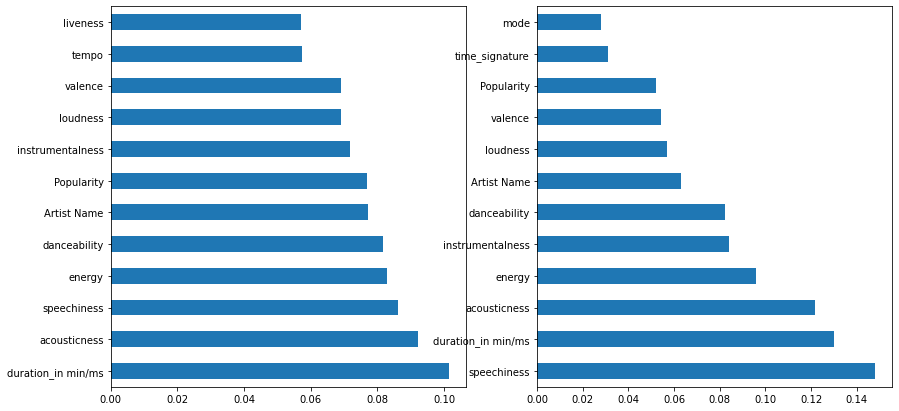

In [179]:
fig ,ax = plt.subplots(1,2,figsize=(14,7))
EXT_ranked_features.nlargest(12).plot(kind = "barh", ax = ax[0])
XGB_ranked_features.nlargest(12).plot(kind = "barh", ax = ax[1])
plt.show()


**Linear correlation**

using pearson corroletion

In [180]:
x_ ["class"] = y_

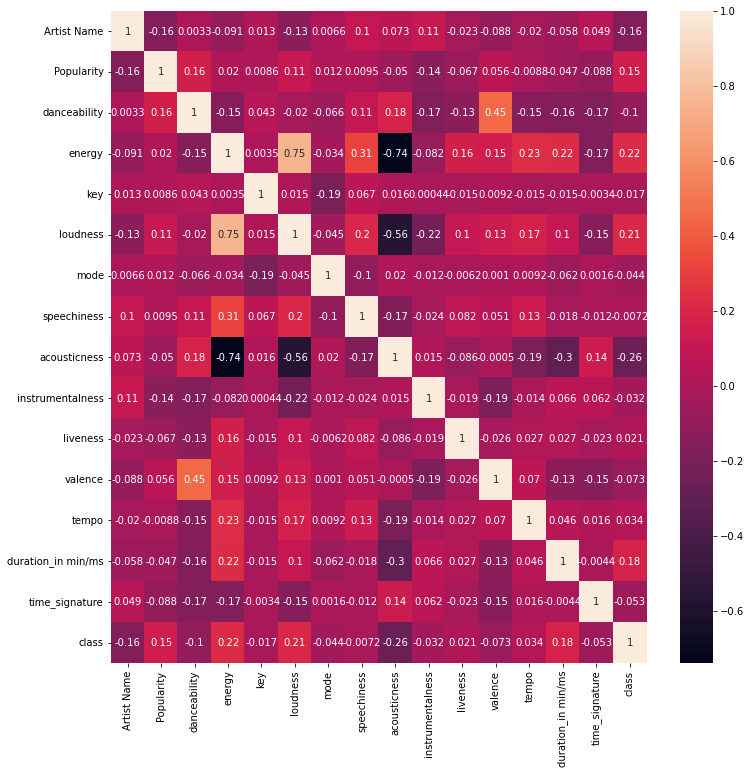

In [181]:
corr = x_.corr(method='pearson')#'pearson', 'kendall', 'spearman'
top_features = corr.index
plt.figure(figsize=(12,12))
sns.heatmap(x_[top_features].corr(method='pearson'),annot=True)
plt.show()

# Outliers Checking 

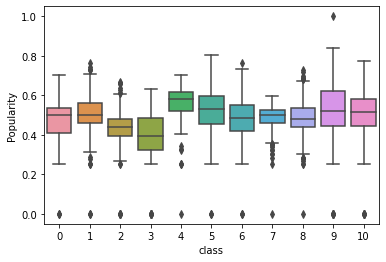

In [182]:
sns.boxplot(data=x_ , y = "Popularity" ,x= "class")

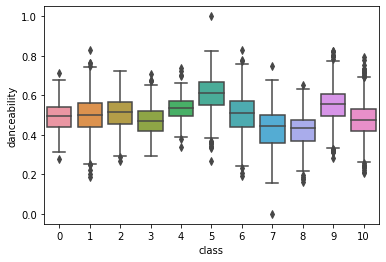

In [183]:
sns.boxplot(data=x_ , y = "danceability" ,x= "class")

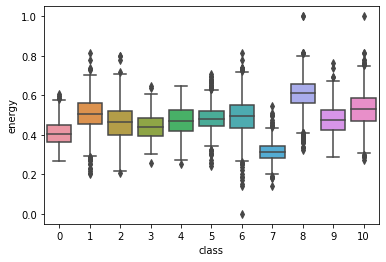

In [184]:
sns.boxplot(data=x_ , y = "energy" ,x= "class")

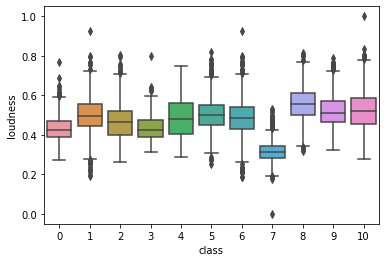

In [185]:
sns.boxplot(data=x_ , y = "loudness" ,x= "class")

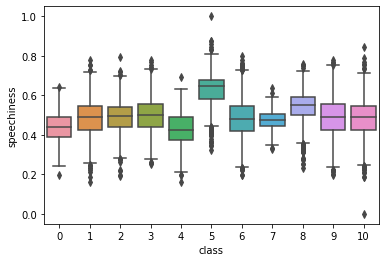

In [186]:
sns.boxplot(data=x_ , y = "speechiness" ,x= "class")

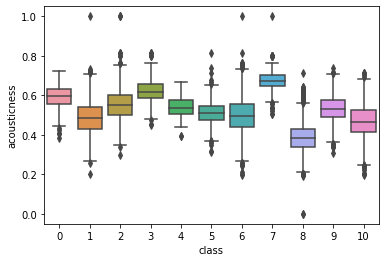

In [187]:
sns.boxplot(data=x_ , y = "acousticness" ,x= "class")

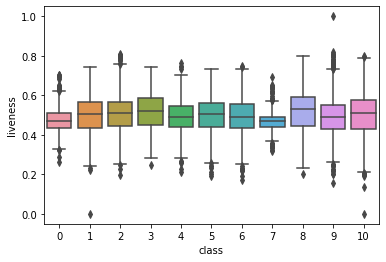

In [188]:
sns.boxplot(data=x_ , y = "liveness" ,x= "class")

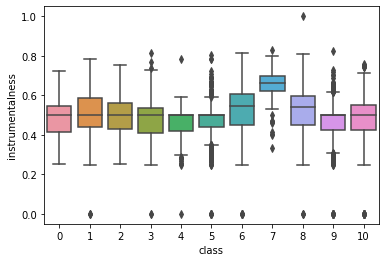

In [189]:
sns.boxplot(data=x_ , y = "instrumentalness" ,x= "class")

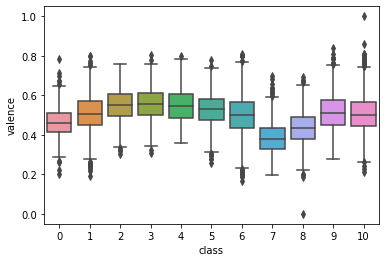

In [190]:
sns.boxplot(data=x_ , y = "valence" ,x= "class")

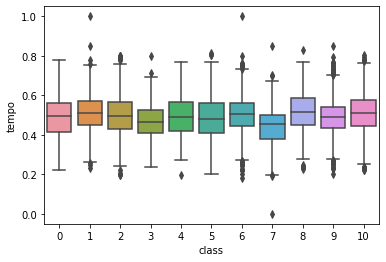

In [191]:
sns.boxplot(data=x_ , y = "tempo" ,x= "class")

In [192]:
y_ = x_["class"]
x_.drop("class",axis=1,inplace=True)

# Test 1: Unbalanced classes data training and testing

In [193]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1 , test_size=0.25, random_state= 107)
for train_index, val_index in split.split(x_,y_):
  x_train = x_.iloc[train_index]
  y_train = y_.iloc[train_index]
  x_val = x_.iloc[val_index]
  y_val = y_.iloc[val_index]

Importing lazy predict library, that's allows us to compare the performance of classification and regression models in a few lines of code.

In [194]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [195]:
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

In [196]:
classifiers_list =[LGBMClassifier,XGBClassifier,RandomForestClassifier,ExtraTreesClassifier,SVC]
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifiers_list)#","XGBClassifier","RandomForestClassifier","BaggingClassifier","ExtraTreesClassifier","SVC"
models,predictions = clf.fit(x_train, x_val, y_train, y_val)

100%|██████████| 5/5 [00:49<00:00,  9.83s/it]


In [197]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.56,0.60,None,0.54,5.29
XGBClassifier,0.55,0.58,None,0.53,19.15
RandomForestClassifier,0.52,0.56,None,0.51,7.83
SVC,0.55,0.56,None,0.52,11.83
ExtraTreesClassifier,0.51,0.54,None,0.50,5.05


In [198]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
LGBM_clf = LGBMClassifier()
LGBM_clf.fit(x_train, y_train)
y_pred = LGBM_clf.predict(x_val)
from sklearn.metrics import f1_score
f1_score(y_val, y_pred, average='weighted')

0.5387547752134991

In [199]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(LGBM_clf,x_train,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
row_sums = conf_mx.sum(axis= 1 , keepdims=True)
norm_conf_mx = np.round(conf_mx/row_sums*100, 1)
norm_conf_mx

array([[77.6,  0. ,  0. ,  4. ,  6.7,  0. ,  0. ,  4.5,  0. ,  2.7,  4.5],
       [ 0. ,  3.3,  3.2,  0. ,  0. ,  3.5, 29.5,  0. ,  4.4,  6.4, 49.7],
       [ 0. ,  1.4, 45.1,  0. ,  0. ,  1.2, 13. ,  0. ,  0.4,  7.7, 31.2],
       [17.4,  0. ,  0. , 70.7,  2.9,  0.4,  0. ,  2.9,  0. ,  2.9,  2.9],
       [17.6,  0. ,  0. ,  1.3, 70.4,  0. ,  0. ,  0. ,  0. ,  5.2,  5.6],
       [ 0. ,  0.3,  1.5,  0.1,  0. , 70.9,  5.8,  0. ,  0.2, 14.9,  6.3],
       [ 0. ,  6.8,  5. ,  0. ,  0. ,  3.3, 34. ,  0. ,  3.9,  8.4, 38.7],
       [ 5.2,  0. ,  0. ,  2. ,  0. ,  0. ,  0. , 92.5,  0. ,  0. ,  0.3],
       [ 0. ,  0.3,  0.3,  0. ,  0. ,  0.1,  3.7,  0. , 56.7,  0.3, 38.8],
       [ 0.9,  1.2,  3.6,  0.3,  0.7,  9.9,  9.2,  0. ,  0.3, 54.8, 19.1],
       [ 0.1,  2.1,  4.9,  0.1,  0.8,  1.4,  8.3,  0. ,  9.3,  6.4, 66.6]])

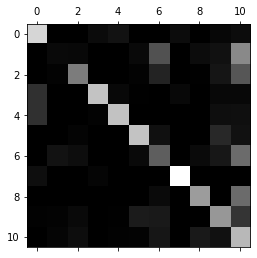

In [200]:
plt.Figure(figsize=(10,10))
plt.matshow(norm_conf_mx,cmap= plt.cm.gray)
plt.show()

In [58]:
y_train_ = y_train
x_train_ = x_train

In [59]:
y_train_.value_counts()

10    2969
6     1552
9     1514
8     1112
5      868
1      823
2      763
0      375
7      346
3      242
4      233
Name: class, dtype: int64

# Test 2: balanced classes data training and testing

Synthetic Minority Oversampling Technique SMOTE 
[SMOTE for Imbalanced Classification](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)


In [60]:
import imblearn
print(imblearn.__version__)

0.8.1


In [61]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
oversample= SMOTE()
x1 , y1 = oversample.fit_resample(x_train_,y_train_)

In [62]:
y1.value_counts()

10    2969
8     2969
2     2969
1     2969
9     2969
6     2969
0     2969
5     2969
3     2969
7     2969
4     2969
Name: class, dtype: int64

In [63]:
classifiers_list =[LGBMClassifier,XGBClassifier,RandomForestClassifier,ExtraTreesClassifier,SVC]
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifiers_list)#","XGBClassifier","RandomForestClassifier","BaggingClassifier","ExtraTreesClassifier","SVC"
models,predictions = clf.fit(x1, x_val, y1, y_val)

100%|██████████| 5/5 [01:38<00:00, 19.69s/it]


In [64]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.53,0.63,None,0.53,9.52
XGBClassifier,0.51,0.62,None,0.50,33.77
SVC,0.50,0.61,None,0.49,38.89
RandomForestClassifier,0.50,0.60,None,0.50,11.86
ExtraTreesClassifier,0.49,0.58,None,0.48,4.37


In [65]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
LGBM_clf = LGBMClassifier()
LGBM_clf.fit(x1, y1)
y_pred = LGBM_clf.predict(x_val)
from sklearn.metrics import f1_score
f1_score(y_val, y_pred, average='weighted')

0.5260803497640617

In [66]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(LGBM_clf,x1,y1,cv=3)
conf_mx = confusion_matrix(y1,y_train_pred)
row_sums = conf_mx.sum(axis= 1 , keepdims=True)
norm_conf_mx = np.round(conf_mx/row_sums*100, 1)
norm_conf_mx

array([[97.9,  0. ,  0. ,  0.4,  1.3,  0. ,  0. ,  0.2,  0. ,  0.1,  0. ],
       [ 0. , 57.4,  5.4,  0. ,  0. ,  3.2, 10.7,  0. ,  6. ,  4.4, 12.8],
       [ 0.1,  3.9, 84.2,  0. ,  0. ,  0.6,  4.3,  0. ,  0.6,  2.1,  4.2],
       [ 1. ,  0. ,  0. , 98.6,  0.3,  0. ,  0. ,  0.1,  0. ,  0. ,  0. ],
       [ 0.7,  0. ,  0. ,  0.1, 99. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.1],
       [ 0. ,  0.8,  1.3,  0.2,  0. , 88.9,  2. ,  0. ,  0.2,  4.9,  1.8],
       [ 0. , 17.5,  8.5,  0. ,  0. ,  4. , 42.6,  0. ,  5.8,  5.4, 16.2],
       [ 0.4,  0. ,  0. ,  0.5,  0. ,  0. ,  0. , 99.1,  0. ,  0. ,  0. ],
       [ 0. ,  3.4,  0.6,  0. ,  0. ,  0. ,  2.8,  0. , 82.7,  0.3, 10.2],
       [ 0.6,  5.6,  5.2,  0.4,  1. ,  9.8,  6. ,  0. ,  0.3, 63.6,  7.6],
       [ 0.2,  9.1,  8.8,  0.5,  1. ,  2.3,  9. ,  0. , 15.5,  8. , 45.6]])

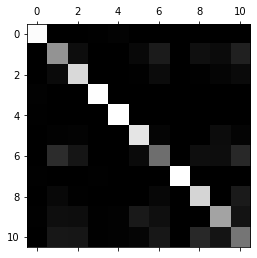

In [67]:
plt.Figure(figsize=(10,10))
plt.matshow(norm_conf_mx,cmap= plt.cm.gray)
plt.show()

Upsampling and downsampling to balance the data using [SMOTE-Tomek Links Method](https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc)

In [68]:
oversample= SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
x1 , y1 = oversample.fit_resample(x_train_,y_train_)

In [69]:
y1.value_counts()

10    2969
8     2969
2     2969
1     2969
9     2969
6     2969
5     2969
3     2969
7     2969
4     2969
0     2968
Name: class, dtype: int64

In [70]:
classifiers_list =[LGBMClassifier,XGBClassifier,RandomForestClassifier,ExtraTreesClassifier,SVC]
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,classifiers=classifiers_list)#","XGBClassifier","RandomForestClassifier","BaggingClassifier","ExtraTreesClassifier","SVC"
models,predictions = clf.fit(x1, x_val, y1, y_val)

100%|██████████| 5/5 [01:36<00:00, 19.30s/it]


In [71]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.52,0.62,None,0.52,9.49
XGBClassifier,0.51,0.62,None,0.50,34.19
RandomForestClassifier,0.50,0.60,None,0.50,12.95
SVC,0.49,0.60,None,0.49,35.63
ExtraTreesClassifier,0.48,0.58,None,0.47,4.22


In [72]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
LGBM_clf = LGBMClassifier()
LGBM_clf.fit(x1, y1)
y_pred = LGBM_clf.predict(x_val)
from sklearn.metrics import f1_score
f1_score(y_val, y_pred, average='weighted')

0.5284783021532043

In [73]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(LGBM_clf,x1,y1,cv=3)
conf_mx = confusion_matrix(y1,y_train_pred)
row_sums = conf_mx.sum(axis= 1 , keepdims=True)
norm_conf_mx = np.round(conf_mx/row_sums*100, 1)
norm_conf_mx

array([[97.5,  0. ,  0. ,  0.5,  1.5,  0. ,  0. ,  0.3,  0. ,  0.2,  0. ],
       [ 0. , 57.5,  5.4,  0. ,  0. ,  2.9, 11.5,  0. ,  5.7,  3.9, 13.2],
       [ 0. ,  4.3, 84.7,  0. ,  0. ,  0.7,  3.7,  0. ,  0.4,  2.1,  4.1],
       [ 1.3,  0. ,  0. , 97.9,  0.2,  0. ,  0.1,  0.3,  0. ,  0. ,  0.1],
       [ 0.8,  0. ,  0. ,  0. , 99.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  1.1,  1.6,  0. ,  0. , 88.9,  1.5,  0. ,  0.3,  5.1,  1.6],
       [ 0. , 18.9,  8.6,  0. ,  0. ,  4.2, 40.8,  0. ,  5.8,  6. , 15.7],
       [ 0.4,  0. ,  0. ,  0.5,  0.1,  0. ,  0. , 99. ,  0. ,  0. ,  0. ],
       [ 0. ,  3.7,  0.8,  0. ,  0. ,  0. ,  2.6,  0. , 81.5,  0.3, 11. ],
       [ 0.6,  4.5,  5.2,  0.3,  0.6, 10.1,  5.6,  0. ,  0.3, 65.3,  7.5],
       [ 0.4, 10.1,  8.4,  0.4,  1. ,  2. ,  9.2,  0. , 14.8,  7.8, 45.8]])

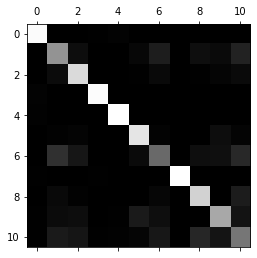

In [74]:
plt.Figure(figsize=(10,10))
plt.matshow(norm_conf_mx,cmap= plt.cm.gray)
plt.show()

We note that:


*   In these two methods (balancing data) the f1-score is lower than the f1-score (without balancing data) because the upsampling and downsampling affect the distribution of the training data which makes **the validation data distribution different from the training data distribution**, and that describes the dropping in f1-score on the validation data.
*   the improvement in confusion matrix for some classes and Worsen in other classes between balancing data and unbalanced data leads to improve the accuracy. 




************************************

# Test 3: with all data

In [75]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         14396 non-null  int64  
 1   Track Name          14396 non-null  object 
 2   Popularity          14045 non-null  float64
 3   danceability        14396 non-null  float64
 4   energy              14396 non-null  float64
 5   key                 12784 non-null  float64
 6   loudness            14396 non-null  float64
 7   mode                14396 non-null  int64  
 8   speechiness         14396 non-null  float64
 9   acousticness        14396 non-null  float64
 10  instrumentalness    10837 non-null  float64
 11  liveness            14396 non-null  float64
 12  valence             14396 non-null  float64
 13  tempo               14396 non-null  float64
 14  duration_in min/ms  14396 non-null  float64
 15  time_signature      14396 non-null  int64  
 16  Clas

In [76]:
num_features = ["Popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]
cat_features = ["Artist Name","Track Name","mode",'key',"time_signature"]

Impute catigorical and numirical Data

In [77]:
for i in cat_features:
    train_df[i] = train_df[i].fillna(train_df[i].mode()[0])
for i in num_features:
    train_df[i] = train_df[i].fillna(train_df[i].median())

In [78]:
Quantile_num_features = ["Popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo",'duration_in min/ms']
skewed_scaler = QuantileTransformer(output_distribution='normal')
train_df[Quantile_num_features] = pd.DataFrame(skewed_scaler.fit_transform(train_df[Quantile_num_features]), columns=Quantile_num_features)

In [79]:
norm_scaler = MinMaxScaler()
train_df[Quantile_num_features] = pd.DataFrame(norm_scaler.fit_transform(train_df[Quantile_num_features]), columns=Quantile_num_features)

In [80]:
train_df["key"]=train_df["key"].astype('int32')

In [81]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1 , test_size=0.25, random_state= 107)
for train_index, val_index in split.split(train_df.drop("Class", axis = 1),train_df["Class"]):
  x_train = train_df.drop("Class", axis = 1).iloc[train_index]
  y_train = train_df["Class"].iloc[train_index]
  x_val = train_df.drop("Class", axis = 1).iloc[val_index]
  y_val = train_df["Class"].iloc[val_index]

In [82]:
x_train

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
6558,361,i can't explain - mono version,0.55,0.52,0.49,9,0.57,1,0.53,0.49,0.50,0.37,0.64,0.55,0.40,4
2089,5327,gods of war,0.48,0.44,0.70,7,0.66,1,0.58,0.36,0.50,0.61,0.42,0.56,0.51,4
10760,1838,phoenix rising,0.52,0.53,0.52,2,0.54,0,0.37,0.45,0.37,0.60,0.38,0.50,0.53,4
11528,436,call it stormy monday,0.55,0.54,0.37,7,0.40,1,0.48,0.58,0.46,0.28,0.49,0.44,0.46,4
4813,761,in search of the peace of mind,0.44,0.27,0.58,9,0.54,1,0.52,0.50,0.59,0.49,0.46,0.67,0.68,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5929,1291,mario kart,0.48,0.52,0.51,8,0.59,1,0.67,0.55,0.50,0.52,0.48,0.35,0.48,4
1106,172,nearly forgot my broken heart,0.58,0.53,0.53,7,0.55,1,0.36,0.50,0.32,0.53,0.56,0.49,0.54,4
6142,6750,breakdown,0.48,0.34,0.58,5,0.61,0,0.57,0.38,0.42,0.58,0.59,0.39,0.54,4
13733,4271,rf shannon,0.49,0.48,0.44,8,0.46,0,0.33,0.46,0.58,0.42,0.53,0.33,0.38,4


In [83]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [84]:
from catboost import Pool, CatBoostClassifier
train_dataset = Pool(data=x_train,label=y_train,cat_features=cat_features)
eval_dataset = Pool(data=x_val,label=y_val,cat_features=cat_features)
model = CatBoostClassifier(iterations=1000,
                           learning_rate=0.01,
                           loss_function='MultiClass')

In [85]:
model.fit(train_dataset)

0:	learn: 2.3798019	total: 477ms	remaining: 7m 57s
1:	learn: 2.3612353	total: 1.15s	remaining: 9m 36s
2:	learn: 2.3431094	total: 1.61s	remaining: 8m 54s
3:	learn: 2.3262695	total: 2.04s	remaining: 8m 29s
4:	learn: 2.3087607	total: 2.46s	remaining: 8m 9s
5:	learn: 2.2929298	total: 2.98s	remaining: 8m 14s
6:	learn: 2.2773884	total: 3.54s	remaining: 8m 22s
7:	learn: 2.2618986	total: 3.98s	remaining: 8m 14s
8:	learn: 2.2477955	total: 4.43s	remaining: 8m 7s
9:	learn: 2.2333856	total: 5.09s	remaining: 8m 23s
10:	learn: 2.2194086	total: 5.88s	remaining: 8m 49s
11:	learn: 2.2049588	total: 6.69s	remaining: 9m 11s
12:	learn: 2.1914863	total: 7.57s	remaining: 9m 35s
13:	learn: 2.1795626	total: 8.53s	remaining: 10m
14:	learn: 2.1668104	total: 9.32s	remaining: 10m 12s
15:	learn: 2.1545887	total: 10.1s	remaining: 10m 23s
16:	learn: 2.1422937	total: 10.9s	remaining: 10m 33s
17:	learn: 2.1306840	total: 11.7s	remaining: 10m 40s
18:	learn: 2.1183605	total: 12.5s	remaining: 10m 46s
19:	learn: 2.1070223	t

In [133]:
cat_importance = pd.DataFrame(model.feature_importances_,index=model.feature_names_, columns= ["score"])
cat_importance.sort_values('score',ascending= False)

,score
duration_in min/ms,27.67
Artist Name,21.20
acousticness,10.17
instrumentalness,6.88
speechiness,6.86
danceability,5.73
Popularity,5.24
energy,4.24
valence,3.80
Track Name,2.76


In [86]:
y_pred = model.predict(x_val)

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       125
           1       0.63      0.20      0.30       275
           2       0.66      0.60      0.63       255
           3       0.94      0.76      0.84        80
           4       0.77      0.75      0.76        77
           5       0.75      0.80      0.78       289
           6       0.54      0.54      0.54       517
           7       0.87      0.95      0.90       115
           8       0.73      0.70      0.71       371
           9       0.67      0.61      0.64       505
          10       0.61      0.76      0.67       990

    accuracy                           0.66      3599
   macro avg       0.72      0.68      0.68      3599
weighted avg       0.66      0.66      0.65      3599



-------------------------------------------------------------------------